In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root
from math import *

import seaborn as sns
sns.set_style('darkgrid')

import ipywidgets as widgets

In [46]:
np.set_printoptions(precision=64)

In [57]:
a = np.float64(1e-12) #pp[0]

h = np.float64(1.054e-27) #pp[3]

m = np.float64(9.1e-28) #pp[1]

U_0 = np.float64(50e6 * 1.6e-12) #pp[2]

pp = (a, m, U_0, m)

In [58]:
def f(xi, pp):
    return  np.sqrt(1/xi - 1) - 1/np.tan(np.sqrt(2 * pp[0] * pp[0] * pp[1] * pp[2] /(pp[3]**2) * (1 - xi)))

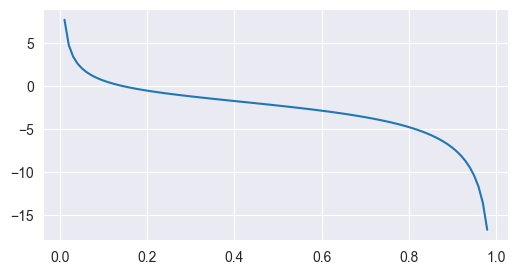

In [59]:
x = np.arange(0.01, 0.99, 0.01)
plt.figure(figsize=(6, 3))
plt.plot(x, f(x,pp))
plt.show()

In [60]:
def dichotomy(f,pp, a, b, eps=1e-10):
    f_a = f(a, pp)
    f_b = f(b, pp)
    count = 0
    if f_a *  f_b > 0:
        raise ValueError("The function must have opposite signs at points a and b")
        
    while True:
        count += 1
        c = (a + b) / 2
        f_c = f(c, pp)
        if f_c == 0 or (b - a) / 2 < eps:
            return (c, count)
        elif f_a * f_c < 0:
            b = c
        else:
            a = c

In [61]:
a = 0.1
b = 0.2

result, count = dichotomy(f,pp, a,b)
print("result = {:.10f}, number of operations = {}".format(result, count))
#theoretical number of iterations
eps_0 = 1e-1
eps=1e-10
print(round(np.log10(eps_0/eps)/np.log10(2)))

result = 0.1432273774, number of operations = 30
30


In [72]:
multiplier = 2 * pp[0] * pp[0] * pp[1] * pp[2] /(pp[3]**2)
def derivative(xi):
    return (multiplier * xi)/(2*np.sqrt(multiplier*(1-xi))*np.sin(multiplier * (1 - xi))**2) - 1/(2*(xi**2)*(np.sqrt(1/xi - 1)))
    

In [73]:
def simple_iterations(f, derivative, pp, xi_0, epsilon=1e-10):
    count = 0
    
    f_xi = f(xi_0, pp)
    d_fxi = derivative(xi_0)
    
    multiplier = 1 / d_fxi
    xi = xi_0
    xi_new = xi - (f_xi * multiplier)
    while(np.abs(xi_new - xi) > epsilon):
        count += 1
        xi = xi_new
        f_xi = f(xi, pp)
        xi_new = xi - (f_xi * multiplier)

    return (xi_new, count)

In [74]:
result = simple_iterations(f, derivative, pp, np.float64(0.1))

print("result = {:.10f}, number of iterations = {}".format(result[0], result[1]))

#theoretical number of iterations
eps_0 = 1e-1
eps=1e-10
print(round(np.log10(eps_0/eps)/(np.log10(np.abs(derivative(0.14)+1)))))

result = 0.1432273774, number of iterations = 14
10


In [75]:
def newtons_method(f, derivative, pp, xi_0, epsilon=np.float64(1e-10)):
    count = 0
    
    f_xi = f(xi_0, pp)
    d_fxi = derivative(xi_0)
    
    xi = xi_0
    xi_new = xi -(f_xi / d_fxi)
    while(np.abs(xi_new - xi) > epsilon):
        count += 1
        xi = xi_new
        f_xi = f(xi, pp)
        xi_new = xi - (f_xi / derivative(xi))
        
    
    return (xi_new, count)
    

In [76]:
result = newtons_method(f, derivative, pp, np.float64(0.1))
print("result = {:.10f}, number of iterations = {}".format(result[0], result[1]))

result = 0.1432273775, number of iterations = 19
